### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



In [2]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
# Numerical libraries
import numpy as np   
from sklearn.cluster import KMeans
# to handle data in form of rows and columns 
import pandas as pd    
# importing ploting libraries
import matplotlib.pyplot as plt   
from sklearn import metrics
import seaborn as sns

### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [304]:
Vehicle_df = pd.read_csv('Vehicle.csv') 
Vehicle_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [305]:
Vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

ATTRIBUTES

COMPACTNESS (average perim)**2/area

CIRCULARITY (average radius)**2/area

DISTANCE CIRCULARITY area/(av.distance from border)**2

RADIUS RATIO (max.rad-min.rad)/av.radius

PR.AXIS ASPECT RATIO (minor axis)/(major axis)

MAX.LENGTH ASPECT RATIO (length perp. max length)/(max length)

SCATTER RATIO (inertia about minor axis)/(inertia about major axis)

ELONGATEDNESS area/(shrink width)**2

PR.AXIS RECTANGULARITY area/(pr.axis length*pr.axis width)

MAX.LENGTH RECTANGULARITY area/(max.length*length perp. to this)

SCALED VARIANCE (2nd order moment about minor axis)/area
ALONG MAJOR AXIS

SCALED VARIANCE (2nd order moment about major axis)/area
ALONG MINOR AXIS

SCALED RADIUS OF GYRATION (mavar+mivar)/area

SKEWNESS ABOUT (3rd order moment about major axis)/sigma_min**3
MAJOR AXIS

SKEWNESS ABOUT (3rd order moment about minor axis)/sigma_maj**3
MINOR AXIS

KURTOSIS ABOUT (4th order moment about major axis)/sigma_min**4
MINOR AXIS

KURTOSIS ABOUT (4th order moment about minor axis)/sigma_maj**4
MAJOR AXIS

HOLLOWS RATIO (area of hollows)/(area of bounding polygon)

Where sigma_maj**2 is the variance along the major axis and sigma_min**2 is the variance along the minor axis, and

area of hollows= area of bounding poly-area of object

The area of the bounding polygon is found as a side result of the computation to find the maximum length. Each individual length computation yields a pair of calipers to the object orientated at every 5 degrees. The object is propagated into an image containing the union of these calipers to obtain an image of the bounding polygon.

NUMBER OF CLASSES

4 OPEL, SAAB, BUS, VAN

In [306]:
Vehicle_df.dropna(inplace=True)

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [307]:
non_numeric_columns=Vehicle_df.select_dtypes(include=["object"]).columns

In [308]:
non_numeric_columns

Index(['class'], dtype='object')

In [309]:
Vehicle_df.groupby(['class']).count()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
class,,,,,,,,,,,,,,,,,,
bus,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205
car,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413
van,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195


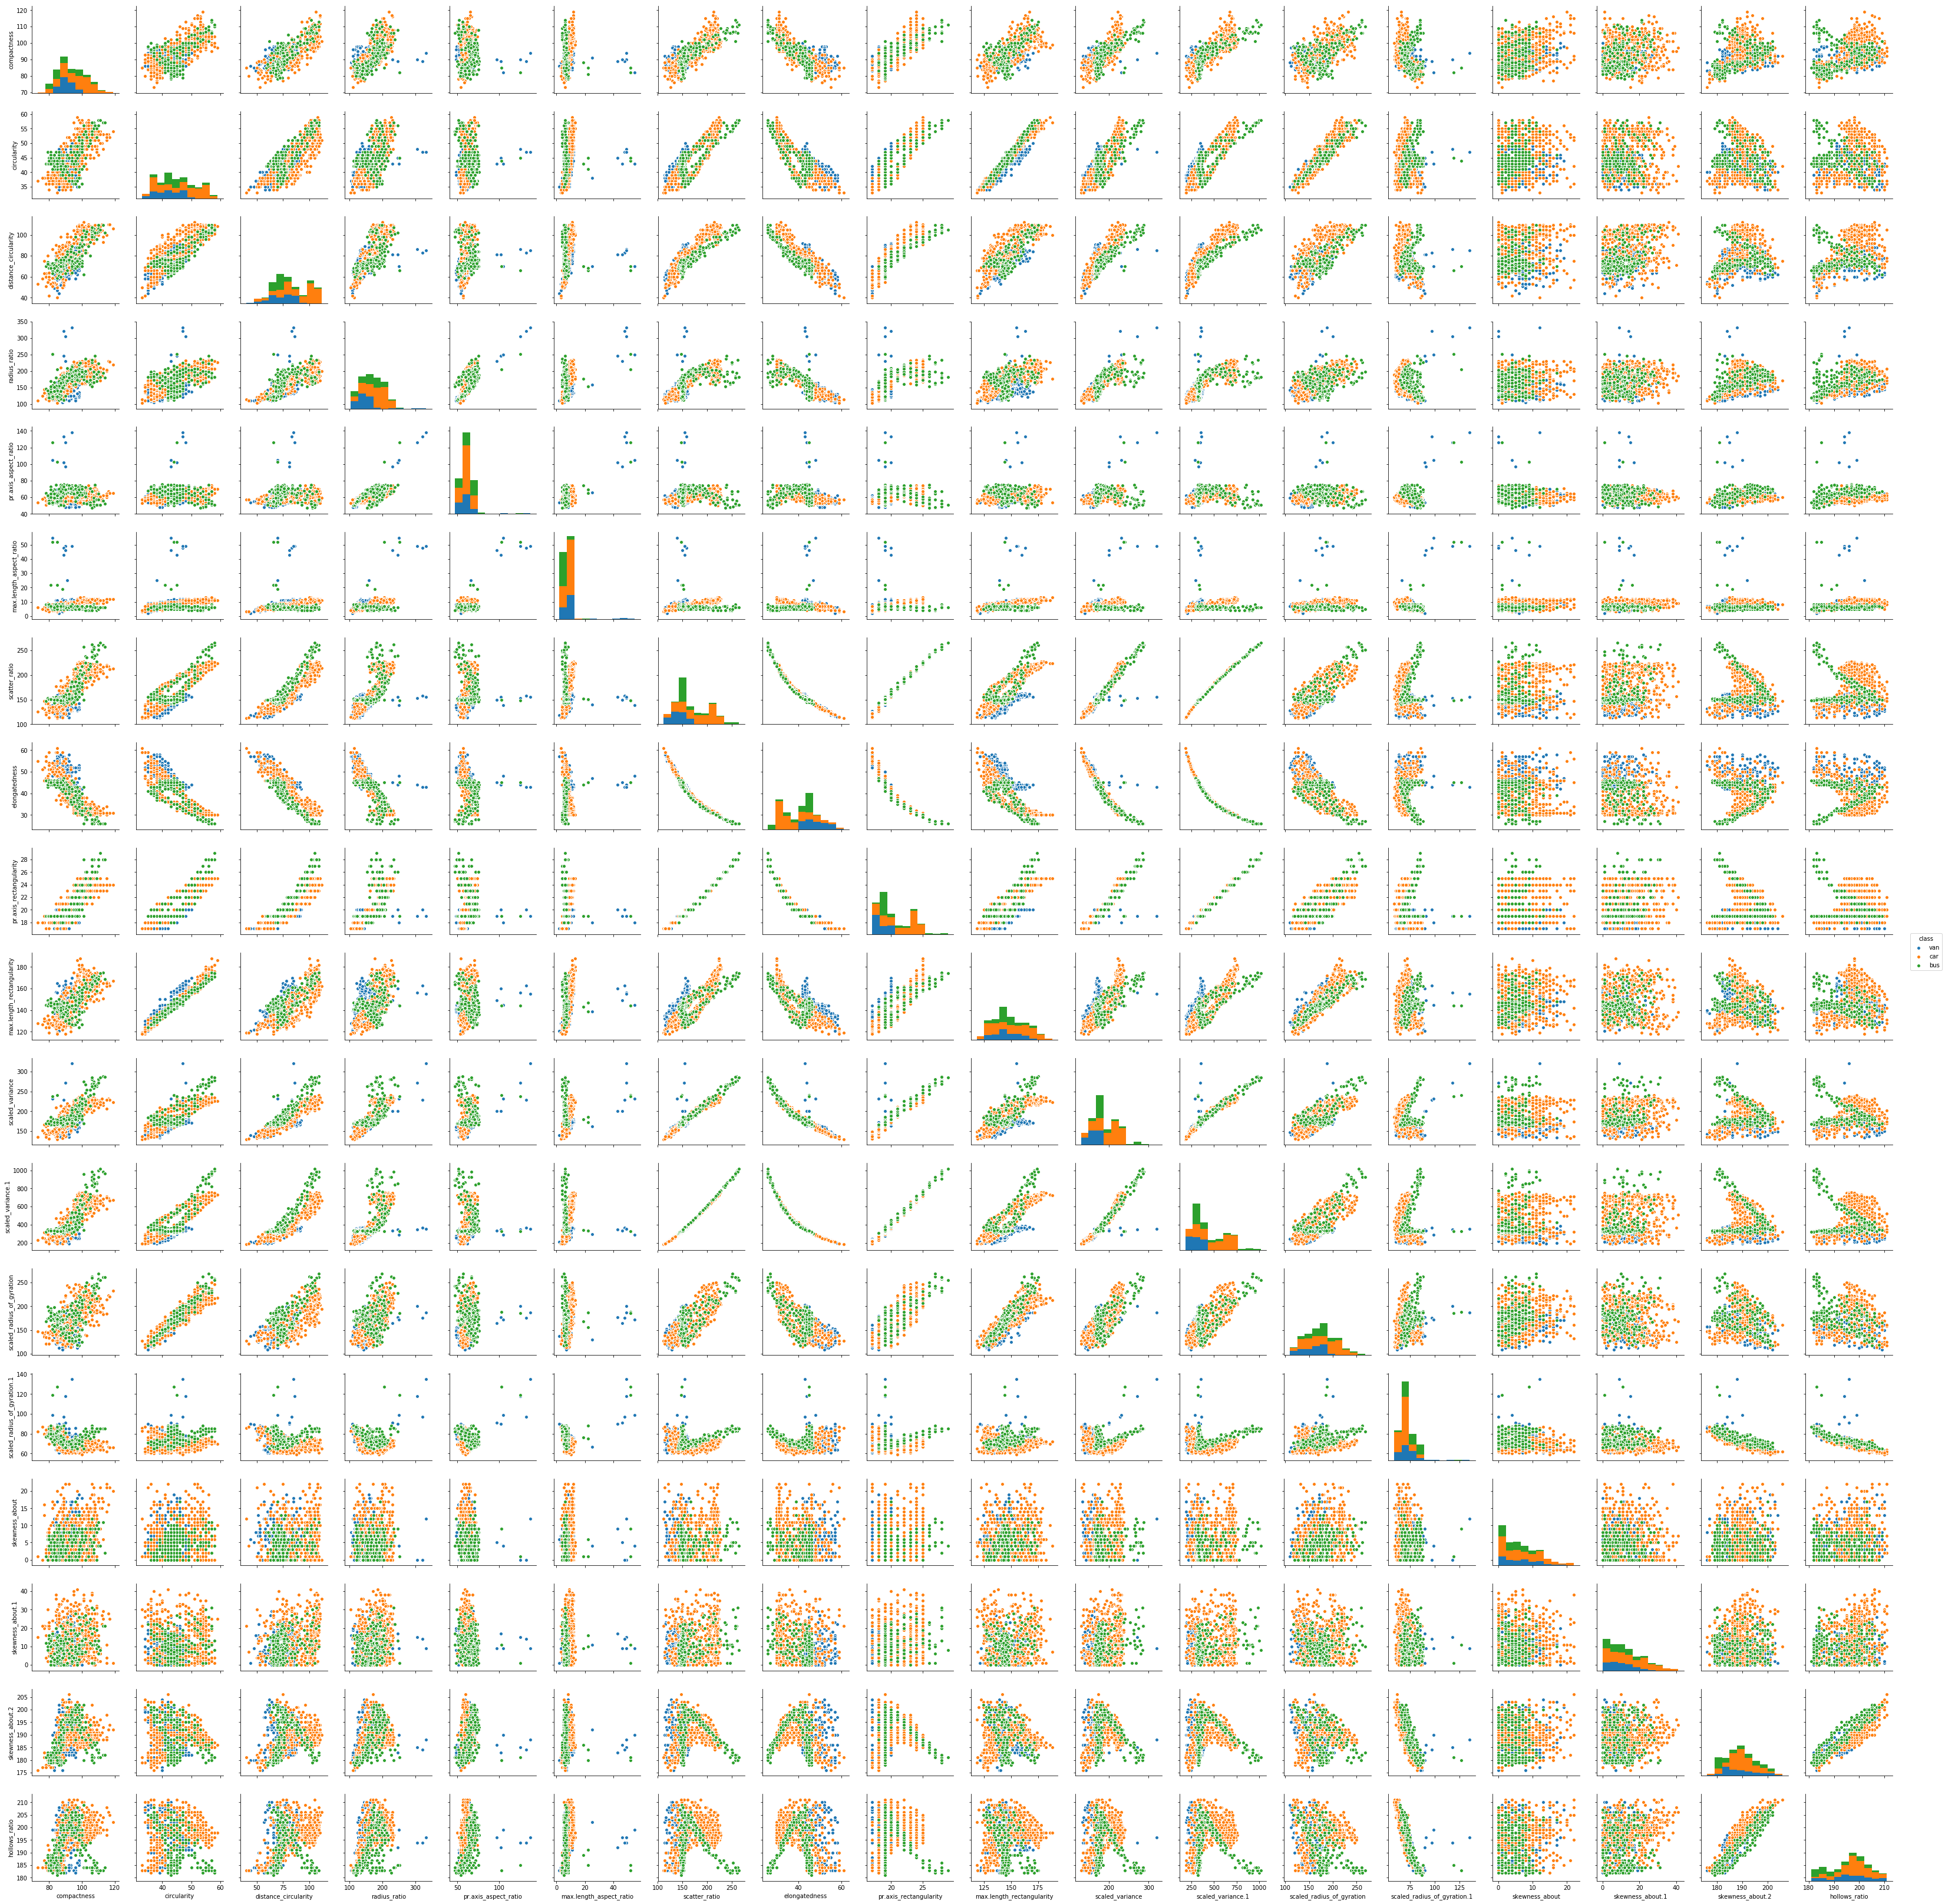

In [310]:
sns.pairplot(Vehicle_df,hue='class')

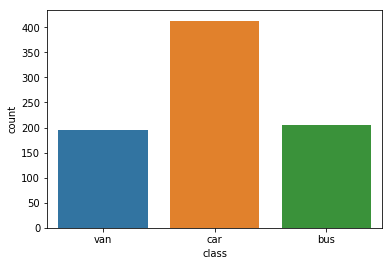

In [311]:
sns.countplot(x='class', data=Vehicle_df)

#### Class is the only non numeric columns in the data set 

### Check for any missing values in the data 

In [312]:
if Vehicle_df.isnull().values.any() == False:
    print("There are no nulls/NaN values in our data frame")
else:
   print("There are nulls/NaN values in our data frame")

There are no nulls/NaN values in our data frame


### 3. Standardize the data 

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [313]:
from sklearn import preprocessing
### using the variable from question 3 - non_numeric_columns for label encoding the data into numeric values
for c in non_numeric_columns:
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(Vehicle_df[c].values))
        Vehicle_df[c] = lbl.transform(list(Vehicle_df[c].values))

In [314]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Vehicle_df_scaled = scaler.fit_transform(Vehicle_df)

# statistics of scaled data
pd.DataFrame(Vehicle_df_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02
mean,-2.425284e-16,-4.642999e-16,-2.351542e-16,3.665238e-16,-2.047016e-16,-1.349201e-16,3.714399e-16,-2.062038e-16,-2.651972e-16,-7.398756e-16,-3.031605e-17,-3.550529e-17,3.348422e-16,1.312159e-16,-1.693329e-17,9.845889e-17,-1.169490e-15,3.482249e-16,3.441282e-17
std,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00
min,-2.510344e+00,-1.921444e+00,-2.665447e+00,-1.937757e+00,-1.854258e+00,-1.411767e+00,-1.710835e+00,-1.922008e+00,-1.383740e+00,-2.062109e+00,-1.874279e+00,-1.452266e+00,-2.019423e+00,-1.793474e+00,-1.291420e+00,-1.422141e+00,-2.110457e+00,-1.992013e+00,-1.408339e+00
25%,-8.089782e-01,-7.819133e-01,-7.635057e-01,-8.363933e-01,-5.992534e-01,-3.420870e-01,-6.824590e-01,-1.024408e+00,-6.060138e-01,-7.513773e-01,-6.863524e-01,-6.872619e-01,-7.815035e-01,-7.227236e-01,-8.847879e-01,-7.496057e-01,-8.096219e-01,-6.396066e-01,-1.408339e+00
50%,-7.982157e-02,-1.307527e-01,-1.929234e-01,-6.246222e-02,-9.725132e-02,-1.281510e-01,-3.497491e-01,2.578765e-01,-2.171510e-01,-1.305046e-01,-3.010789e-01,-4.246486e-01,-3.875161e-02,-1.873484e-01,-7.152328e-02,-1.891593e-01,3.400092e-03,1.718371e-01,1.753846e-02
75%,7.708611e-01,6.831980e-01,1.011639e+00,7.710020e-01,4.047507e-01,2.997208e-01,8.903515e-01,6.425619e-01,9.494376e-01,7.663115e-01,9.189540e-01,8.427456e-01,7.349483e-01,3.480268e-01,5.384252e-01,7.075550e-01,6.538177e-01,7.127995e-01,1.753846e-02
max,3.079857e+00,2.311100e+00,1.899212e+00,4.878790e+00,9.566288e+00,9.926837e+00,2.916857e+00,2.565989e+00,3.282615e+00,2.766901e+00,4.225885e+00,3.309026e+00,2.901308e+00,8.378655e+00,3.181535e+00,3.173519e+00,2.767675e+00,2.065206e+00,1.443415e+00


### K - Means Clustering

### Assign a dummy array called Cluster_error

In [315]:
cluster_errors=[]

### 5. Calculate errorrs for each K

Iterating values of k from 1 to 10 fit K means model
Using inertia

In [316]:
# Label, Intertia and Centroid
cluster_range = range( 1, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans(num_clusters, init='k-means++')
  clusters.fit(Vehicle_df_scaled)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

### 6. Plotting Elbow/ Scree Plot

Use Matplotlib to plot the scree plot - Note: Scree plot plots Errors vs the no of clusters

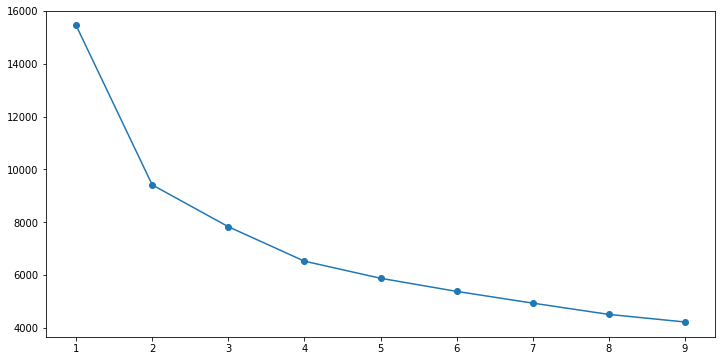

In [317]:
# Elbow plot to identify number of clusters

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

### Find out the optimal value of K

#### Elbow noticed at K value = 2  and K value = 4, however taking the value of 3 given it is giving optimal clustering, with 4 it given uneven clustering

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [418]:
cluster = KMeans( n_clusters = 3, init='k-means++' )
cluster.fit(Vehicle_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [419]:
# Get the centroids.... using function cluster_centers_

centroids = cluster.cluster_centers_
centroids

array([[-9.48626564e-01, -5.43440046e-01, -9.30342642e-01,
        -1.08549261e+00, -5.08981064e-01, -2.34180678e-01,
        -7.90576445e-01,  8.86645992e-01, -7.54395711e-01,
        -5.14465358e-01, -7.98019813e-01, -7.93529066e-01,
        -4.01711879e-01,  8.78705796e-01, -7.59819635e-02,
        -2.82075418e-01, -1.08704782e+00, -1.16455364e+00,
        -1.99846163e-02, -3.10862447e-15],
       [-2.40975742e-01, -5.63006085e-01, -3.12828388e-01,
        -6.43110786e-02,  1.81811929e-01, -1.08883514e-01,
        -4.71298091e-01,  3.39512627e-01, -4.99740750e-01,
        -5.19567696e-01, -4.24717396e-01, -4.76472722e-01,
        -5.88991601e-01, -5.92620813e-01, -7.65746090e-02,
        -1.89367387e-02,  7.64913851e-01,  6.67859301e-01,
         1.81381471e-01,  1.00000000e+00],
       [ 1.11741842e+00,  1.16042696e+00,  1.18953940e+00,
         1.01977370e+00,  2.18647306e-01,  3.36325803e-01,
         1.26239321e+00, -1.18432834e+00,  1.26585074e+00,
         1.08212509e+00,  1.2

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [420]:
# Let us put the raw centroid values into a dataframe under respective columns
centroid_df = pd.DataFrame(centroids, columns = list(Vehicle_df_scaled) )

Hint: Use pd.Dataframe function 

In [421]:
prediction=cluster.predict(Vehicle_df_scaled)
Vehicle_df_scaled = pd.DataFrame(Vehicle_df_scaled)
Vehicle_df_scaled["GROUP"] = prediction

In [422]:
Vehicle_df_scaled["GROUP"].value_counts()

1    322
2    263
0    228
Name: GROUP, dtype: int64

### Use kmeans.labels_ function to print out the labels of the classes

In [423]:
label=cluster.labels_

In [424]:
print(label)

[1 1 2 1 0 1 1 1 1 1 1 1 1 2 0 1 2 0 0 1 1 2 1 0 2 2 0 1 1 1 2 1 0 2 2 0 2
 0 0 1 2 0 0 0 0 1 0 1 2 1 2 1 1 0 2 0 2 0 0 0 1 0 2 1 2 2 1 0 1 2 1 0 0 2
 1 0 1 2 1 0 1 0 2 1 2 1 0 2 0 0 2 0 0 1 1 0 2 2 0 0 2 1 1 0 0 0 1 2 2 1 0
 0 1 0 1 0 0 0 1 2 2 1 1 0 2 2 0 1 0 1 1 2 0 1 2 1 1 1 1 2 1 1 2 1 2 1 0 1
 0 2 1 1 2 2 1 2 0 0 2 2 1 2 1 1 1 1 0 2 0 1 0 2 1 1 1 2 1 2 1 2 1 0 2 0 0
 0 1 1 2 2 1 1 1 0 2 1 1 1 2 0 0 2 0 1 2 0 0 0 1 2 1 2 0 0 0 0 2 1 0 1 2 0
 1 1 0 2 0 0 1 1 2 0 2 0 1 1 2 1 1 2 2 0 1 1 1 2 0 1 1 0 0 1 1 2 1 0 0 2 1
 1 0 0 2 0 1 2 0 1 2 1 1 2 1 2 0 1 1 2 1 1 1 0 1 2 2 2 2 1 1 2 0 0 0 2 0 2
 2 0 2 1 0 2 1 1 1 2 2 0 2 2 0 2 1 1 1 0 0 2 2 2 1 1 1 2 0 1 0 2 1 1 2 1 2
 2 2 1 1 0 2 1 0 0 1 1 1 1 0 2 2 0 0 2 0 2 0 2 1 1 1 1 2 2 0 1 1 1 2 1 1 1
 1 2 1 2 1 2 1 0 0 1 1 1 0 0 1 0 2 1 1 0 0 2 1 0 1 1 2 1 2 1 2 2 0 0 2 1 0
 0 2 2 2 0 1 2 2 0 2 2 2 1 1 1 1 1 2 0 0 1 2 1 1 2 1 0 2 0 0 2 1 1 2 2 2 0
 2 2 1 2 0 2 2 1 1 0 0 2 1 0 2 2 1 0 2 2 1 1 0 2 2 2 0 0 2 2 2 1 1 2 0 1 2
 1 0 0 1 2 0 1 1 0 1 2 1 

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [425]:
np.random.seed(101)  # for repeatability of this dataset
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

In [426]:
a.shape

(100, 2)

In [427]:
b.shape

(50, 2)

In [428]:
c.shape

(100, 2)

a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.multivariate_normal.html

### 9. Combine all three arrays a,b,c into a dataframe

In [429]:
heirachical_df=pd.DataFrame(a,columns=['first','second'])
heirachical_dfb=pd.DataFrame(b,columns=['first','second'])
heirachical_dfc=pd.DataFrame(c,columns=['first','second'])
heirachical_df=heirachical_df.append(heirachical_dfb)
heirachical_df=heirachical_df.append(heirachical_dfc)

In [430]:
heirachical_df.shape

(250, 2)

### 10. Use scatter matrix to print all the 3 distributions

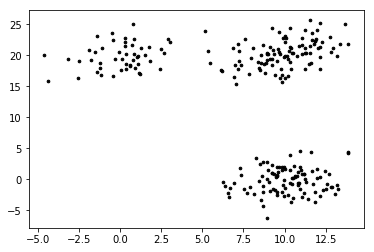

In [431]:
f1 = heirachical_df['first'].values

f2 = heirachical_df['second'].values

X = np.array(list(zip(f1, f2)))

plt.scatter(f1, f2, c='black', s=7)

### 11. Find out the linkage matrix

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.linkage.html

Use ward as linkage metric and distance as Eucledian

In [432]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
%matplotlib inline

# Case 1: Ward Method
Z = linkage(heirachical_df, 'ward')
c, coph_dists = cophenet(Z , pdist(X))
print("Ward",c)
# Case 2: Average Linkage
Z = linkage(heirachical_df, 'average')
c, coph_dists = cophenet(Z , pdist(X))
print("Average", c)
# Case 3: Complete Linkage
Z = linkage(heirachical_df, 'complete')
c, coph_dists = cophenet(Z , pdist(X))
print("Complete",c)
# Case 3: Single Linkage
Z = linkage(heirachical_df, 'single')
c, coph_dists = cophenet(Z , pdist(X))
print("Single",c)

Ward 0.9536963071171022
Average 0.9570116112695627
Complete 0.9448184225329517
Single 0.9430374735203884


### 12. Plot the dendrogram for the consolidated dataframe

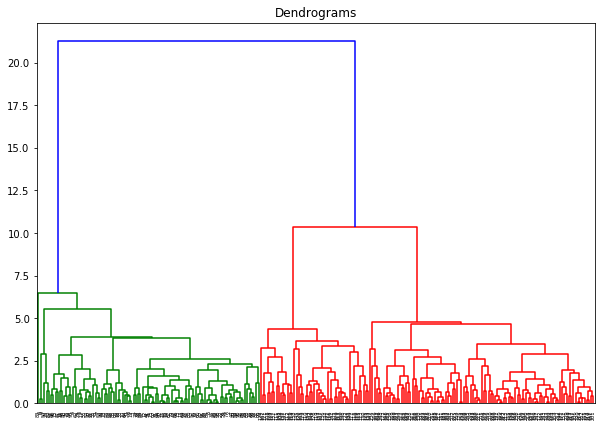

In [433]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(heirachical_df, method='average'))

### 13. Recreate the dendrogram for last 12 merged clusters 

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

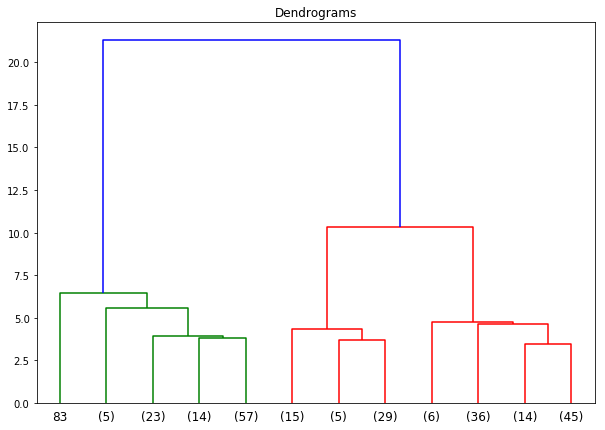

In [434]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(heirachical_df, method='average'),p=12,truncate_mode='lastp')

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.hierarchy.fcluster.html

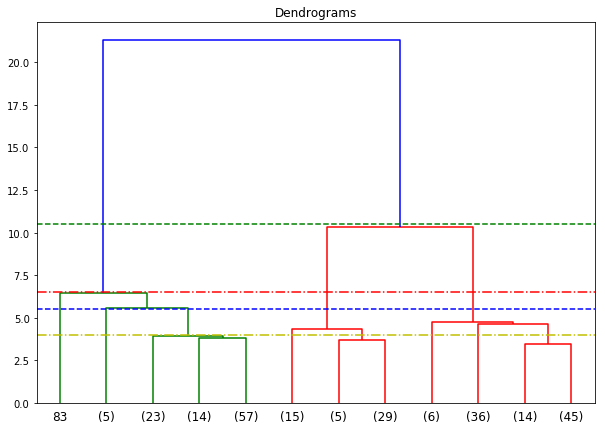

In [435]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(heirachical_df, method='average'),p=12,truncate_mode='lastp')
plt.axhline(y=10.5, color='g', linestyle='--')
plt.axhline(y=6.5, color='r', linestyle='-.')
plt.axhline(y=5.5, color='b', linestyle='--')
plt.axhline(y=4, color='y', linestyle='-.')

###### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [401]:
# number of target cluster
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial import distance
n_clusters = range(1, 3)

for n_clust in n_clusters:
    Z = shc.linkage(distance.pdist(heirachical_df.T.values), method='average', metric='euclidean')
    print("--------\nValues from n cluster value:\n{}".format(n_clust))
    print("--------\nValues from distance:\n{}".format(distance.pdist(heirachical_df.T.values)))
    print("--------\nValues from flcuster:\n{}".format(shc.fcluster(Z, n_clust, criterion='maxclust')))
    
    print("\nValues from AgglomerativeClustering:\n{}"
          .format(AgglomerativeClustering(n_clusters=n_clust, affinity='euclidean', linkage='average')
                  .fit(heirachical_df.T.values).labels_))

--------
Values from n cluster value:
1
--------
Values from distance:
[205.42882649]
--------
Values from flcuster:
[1 2]

Values from AgglomerativeClustering:
[0 0]
--------
Values from n cluster value:
2
--------
Values from distance:
[205.42882649]
--------
Values from flcuster:
[1 2]

Values from AgglomerativeClustering:
[1 0]


In [367]:
## considering branch value of 3 which is optimum

In [437]:
fcluster=shc.fcluster(Z, 4, criterion='distance')
print(fcluster)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [369]:
acluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')  
acluster.fit_predict(heirachical_df)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [370]:
heirachical_df['labels'] = acluster.labels_
heirachical_df.groupby(['labels']).count()

,first,second
labels,,
0,100,100
1,101,101
2,49,49


In [371]:
Cluster = heirachical_df.groupby(['labels'])
Group=Cluster.head(5)

### Use matplotlib to visually observe the clusters in 2D space 

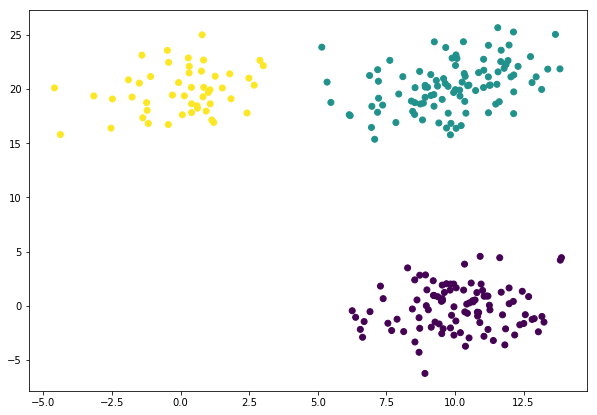

In [373]:
plt.figure(figsize=(10, 7))  
plt.scatter(heirachical_df['first'], heirachical_df['second'], c=acluster.labels_) 

In [402]:
## 3 unique clusters are visible